_version log: 2D fourier transform to ignore angle_

In [22]:
from numpy import genfromtxt
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
import pandas as pd

beamABroadband = genfromtxt('data\\0307_BB_BA.csv', delimiter=';') #data\\beama2_broad.csv
beamBBroadband = genfromtxt('data\\0307_BB_BB.csv', delimiter=';') #data\\beamb2_broad.csv
fringesBroadband = genfromtxt('data\\0307_fringesBB.csv', delimiter=';') #data\\fringes2_broad.csv

BeamBackground = np.maximum(beamABroadband, beamBBroadband) #Esimate the background light
#BeamBackground = beamABroadband + beamBBroadband

fringesCOR = ndimage.median_filter(fringesBroadband - BeamBackground, size=2)

In [23]:
#run this cell to import mock data insted
fringesCOR = genfromtxt('data\\elin_mock_interferogram.csv', delimiter=';') #data\\mock_interferogram.csv

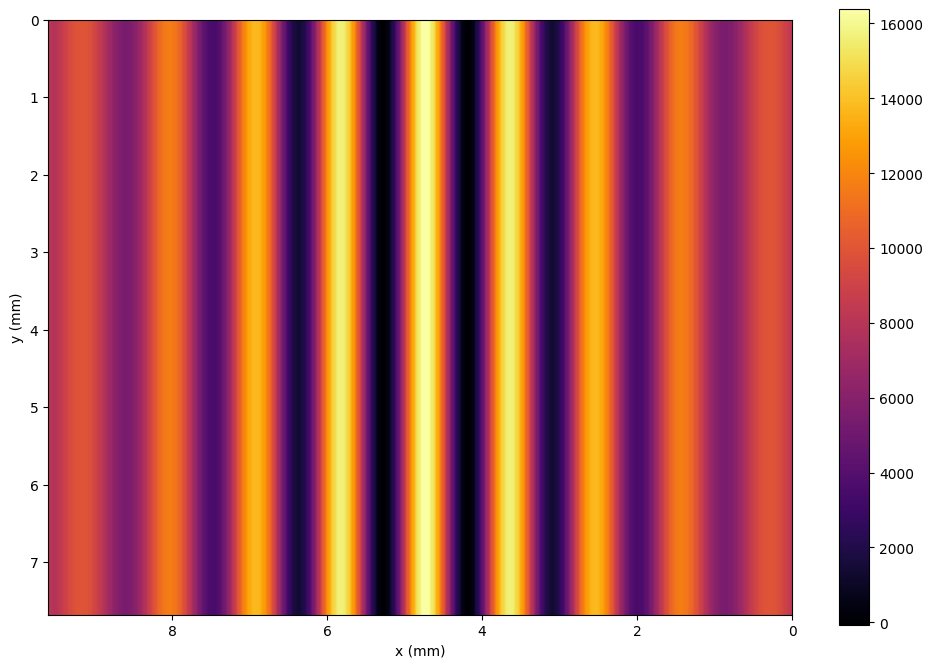

8192.033333333333


In [24]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(1, 1, 1)

im=plt.imshow(fringesCOR, cmap='inferno', extent=[9.6,0,7.68,0])

ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
plt.colorbar(im)
plt.show()

print(fringesCOR.mean()) #We expect this to be close to 0

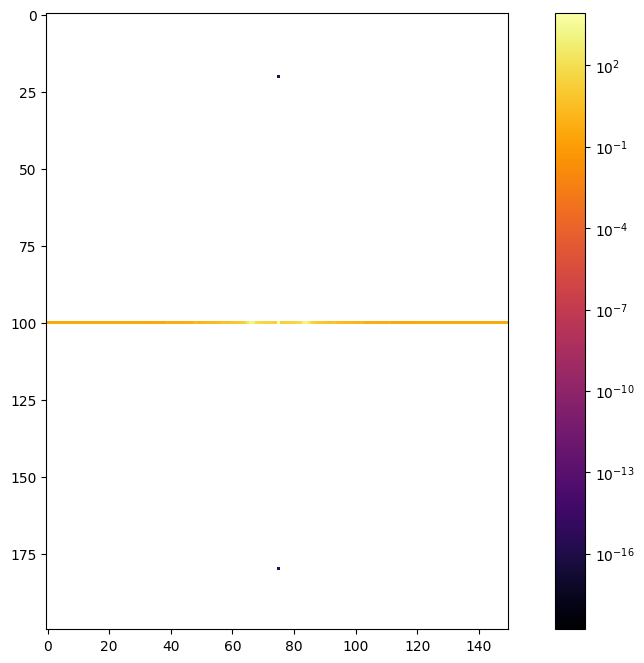

In [25]:
FT = np.fft.fft2(fringesCOR, norm = "forward")
FT = np.fft.fftshift(FT) #rearranges the array such that 0,0 is centred

plt.figure(figsize = (12,8))

im=plt.imshow(np.abs(FT), cmap='inferno', norm = "log")

plt.colorbar(im)
plt.show()

In [26]:
#################FINDING WAVENUMBERS############

k_x = np.arange(-FT.shape[1]//2, FT.shape[1]//2)
k_y = np.arange(-FT.shape[0]//2, FT.shape[0]//2)
k_x = list(k_x)*FT.shape[0]
k_y = np.repeat(k_y, FT.shape[1])

amplitudes = np.abs(FT.flatten())

def pythagorus(x,y):
    return np.sqrt( (x)**2 +
                    (y)**2)
vpythagorus = np.vectorize(pythagorus)
wavenumbers = vpythagorus(k_x, k_y)

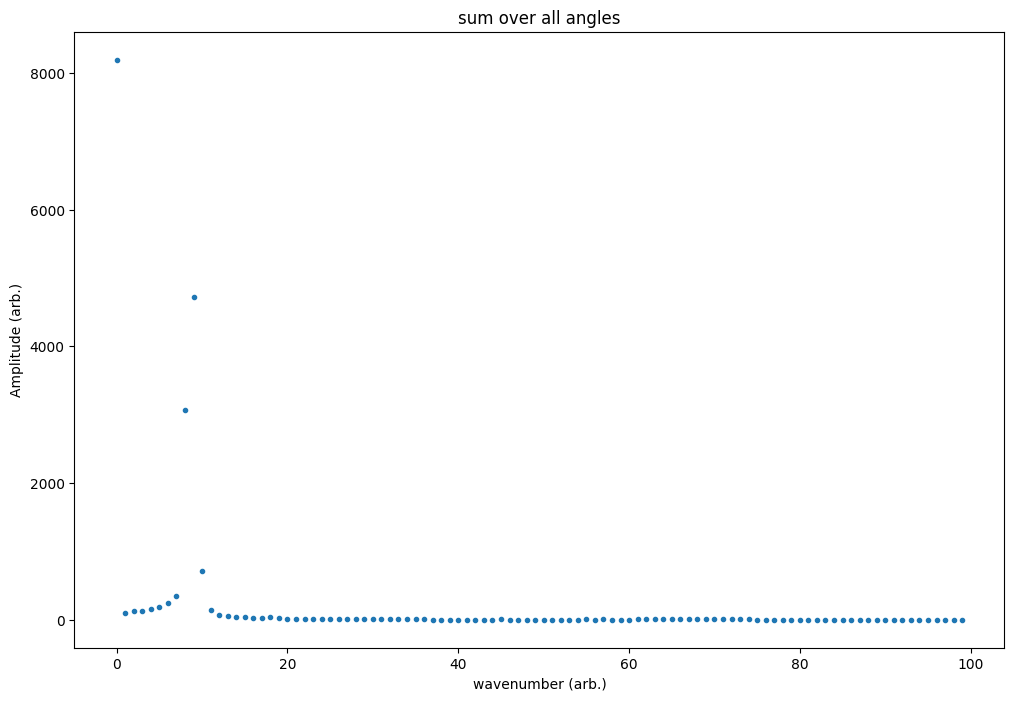

In [27]:
max_wavenumber = np.ceil(np.max(wavenumbers)).astype(int)
angular_sum = np.zeros(max_wavenumber)

for i in range(0, max_wavenumber):
    flagBinMembers = (np.floor(wavenumbers) == i)
    binMembers = amplitudes[flagBinMembers] 
    angular_sum[i] = np.sum(binMembers)

#print(angular_sum)

plt.figure(figsize = (12,8))
plt.subplot(1, 1, 1)

plt.plot(angular_sum[:len(FT)//2],
        linestyle = "none",
        marker = ".")

plt.xlabel('wavenumber (arb.)')
plt.ylabel('Amplitude (arb.)')
#plt.yscale("log")
plt.title("sum over all angles")

plt.show()